# UMD IC Team IC22034
# Khang Nguyen and Elvin Vanathayan
# Mentor: Akshay

# Category: Cybersecurity
# Organization: BigBear.ai
# Project Name: ISCXIDS2012 Cybersecurity Dataset

# Dataset Description:
- Malicious hackers and automated malware attacks are one of the biggest threats facing cybersecurity experts today. To help encourage novel solutions to these problems, researchers at the Canadian Institute for Cybersecurity have assembled a number of datasets cybersecurity researchers and practitioners can use to evaluate their malware detection methodologies. The dataset for this challenge represents a subset of their 2012 Intrusion Detection Evaluation Dataset. Here, the UNB researchers employed real cyber attack and malware scenarios, along with background network traffic simulations to create an evaluation dataset. This dataset contains multiple possible challenges, ranging from dataset exploration, to machine learning, to novel visualizations.

# Challenge Description:
- Challenge 1:
    Help improve cybersecurity for networks. Create a machine learning model to predict whether network traffic is associated       with normal (Tag=”Normal”) or malicious (Tag=”Attack”) activities.
    
- Challenge 2:
    Predict internet traffic. Create a machine learning model to predict what type of traffic each row represents, using the       column “appName”. There are a huge variety of features that could be explored for this type of model, including analysis of     the actual packet payloads themselves.

- Challenge 3:
    Understanding a network. Do exploratory data analysis to understand activity on this network, and create informative           visualizations to convey this information. There are a variety of options here: join the dataset to open source information     about what different ports are used for; join the dataset to open source geolocation information and create a visualization     in Google Earth; show IP activity over time, before, during, and after attack scenarios are carried out.

In [1]:
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score, precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
# We start by importing the dataset 
data = pd.read_csv("iscxIDS2012_subset_no_payload.csv")

In [3]:
print(data.shape)
data.head()

(137820, 17)


,Tag,appName,destination,destinationPort,destinationTCPFlagsDescription,direction,protocolName,source,sourceFile,sourcePort,sourceTCPFlagsDescription,startDateTime,stopDateTime,totalDestinationBytes,totalDestinationPackets,totalSourceBytes,totalSourcePackets
0,Attack,Unknown_TCP,131.202.243.84,5555,-,L2R,tcp_ip,192.168.2.112,TestbedMonJun14Flows.xml,3870,S,2010-06-13T23:59:17,2010-06-14T00:00:50,0,0,990,15
1,Attack,Unknown_TCP,131.202.243.84,5555,-,L2R,tcp_ip,192.168.2.112,TestbedMonJun14Flows.xml,3934,S,2010-06-14T00:59:17,2010-06-14T01:00:50,0,0,990,15
2,Attack,Unknown_TCP,131.202.243.84,5555,-,L2R,tcp_ip,192.168.2.112,TestbedMonJun14Flows.xml,3967,S,2010-06-14T01:59:17,2010-06-14T02:00:50,0,0,990,15
3,Attack,Unknown_TCP,131.202.243.84,5555,-,L2R,tcp_ip,192.168.2.112,TestbedMonJun14Flows.xml,4000,S,2010-06-14T02:59:17,2010-06-14T03:00:50,0,0,990,15
4,Attack,SSH,192.168.5.122,22,"S,A",R2L,tcp_ip,218.108.130.167,TestbedMonJun14Flows.xml,51693,"S,R",2010-06-14T03:42:58,2010-06-14T03:42:59,66,1,130,2


In [4]:
data.isna().sum()

Tag                               0
appName                           0
destination                       0
destinationPort                   0
destinationTCPFlagsDescription    0
direction                         0
protocolName                      0
source                            0
sourceFile                        0
sourcePort                        0
sourceTCPFlagsDescription         0
startDateTime                     0
stopDateTime                      0
totalDestinationBytes             0
totalDestinationPackets           0
totalSourceBytes                  0
totalSourcePackets                0
dtype: int64

In [5]:
for col in data:
    print(data[col].unique())

['Attack' 'Normal']
['Unknown_TCP' 'SSH' 'SecureWeb' 'ICMP' 'HTTPWeb' 'AOL-ICQ' 'Oracle'
 'MiscApplication' 'MSMQ' 'Authentication' 'IRC' 'Filenet' 'Groove'
 'Hotline' 'Real' 'Misc-DB' 'Timbuktu' 'Google' 'OpenNap' 'Yahoo'
 'Misc-Ports' 'ManagementServices' 'Anet' 'XWindows' 'LDAP' 'Flowgen'
 'Squid' 'SNMP-Ports' 'MiscApp' 'NETBEUI' 'Misc-Mail-Port' 'Tacacs' 'MDQS'
 'SMS' 'Hosts2-Ns' 'TimeServer' 'MS-SQL' 'BitTorrent' 'NortonAntiVirus'
 'MSN' 'rexec' 'Network-Config-Ports' 'MicrosoftMediaServer'
 'StreamingAudio' 'Citrix' 'SMTP' 'IPSec' 'NNTPNews' 'Telnet' 'H.323'
 'PostgreSQL' 'rlogin' 'SSL-Shell' 'PCAnywhere' 'Webmin' 'FTP'
 'MSTerminalServices' 'IMAP' 'dsp3270' 'Gnutella' 'Printer' 'Intellex'
 'Ingres' 'rsh' 'POP' 'PPTP' 'WindowsFileSharing' 'SunRPC' 'RPC' 'RTSP'
 'NetBIOS-IP' 'VNC' 'DNS' 'XFER' 'POP-port' 'Common-P2P-Port' 'BGP' 'NFS'
 'HTTPImageTransfer' 'Unknown_UDP' 'WebMediaDocuments' 'WebMediaVideo'
 'NortonGhost' 'WebFileTransfer' 'GuptaSQLBase' 'Web-Port' 'IGMP'
 'Common-Por

In [12]:
data.dtypes

Tag                               object
appName                           object
destination                       object
destinationPort                    int64
destinationTCPFlagsDescription    object
direction                         object
protocolName                      object
source                            object
sourceFile                        object
sourcePort                         int64
sourceTCPFlagsDescription         object
startDateTime                     object
stopDateTime                      object
totalDestinationBytes              int64
totalDestinationPackets            int64
totalSourceBytes                   int64
totalSourcePackets                 int64
dtype: object

In [15]:
transformed_data = data.drop(['destination', 'source', 'stopDateTime', 'startDateTime' ], axis=1).copy()

In [17]:
le = LabelEncoder()

for col in transformed_data.columns:
    if transformed_data[col].dtype == 'object':
        transformed_data[col] = le.fit_transform(transformed_data[col].values)
        
transformed_data.head(10)

,Tag,appName,destinationPort,destinationTCPFlagsDescription,direction,protocolName,sourceFile,sourcePort,sourceTCPFlagsDescription,totalDestinationBytes,totalDestinationPackets,totalSourceBytes,totalSourcePackets
0,0,76,5555,0,1,3,0,3870,17,0,0,990,15
1,0,76,5555,0,1,3,0,3934,17,0,0,990,15
2,0,76,5555,0,1,3,0,3967,17,0,0,990,15
3,0,76,5555,0,1,3,0,4000,17,0,0,990,15
4,0,66,22,17,2,3,0,51693,20,66,1,130,2
5,0,66,22,7,2,3,0,54053,11,2651,14,1304,12
6,0,76,5555,0,1,3,0,4039,17,0,0,990,15
7,0,76,5555,0,1,3,0,4558,17,0,0,990,15
8,0,76,5555,0,1,3,0,1562,17,0,0,990,15
9,0,76,5555,0,1,3,0,2030,17,0,0,990,15


In [24]:
transformed_data["appName"].value_counts()

19    64454
18    24796
76    14989
8     10930
66     7498
      ...  
49        1
91        1
90        1
16        1
51        1
Name: appName, Length: 95, dtype: int64

In [25]:
transformed_data.head()

,Tag,appName,destinationPort,destinationTCPFlagsDescription,direction,protocolName,sourceFile,sourcePort,sourceTCPFlagsDescription,totalDestinationBytes,totalDestinationPackets,totalSourceBytes,totalSourcePackets
0,0,76,5555,0,1,3,0,3870,17,0,0,990,15
1,0,76,5555,0,1,3,0,3934,17,0,0,990,15
2,0,76,5555,0,1,3,0,3967,17,0,0,990,15
3,0,76,5555,0,1,3,0,4000,17,0,0,990,15
4,0,66,22,17,2,3,0,51693,20,66,1,130,2


In [44]:
# x = cleaned_data.drop(['Tag'], axis=1).copy()
x = transformed_data.drop(['Tag', 'sourceFile', 'destinationTCPFlagsDescription', 
                      'sourceTCPFlagsDescription', 'totalDestinationBytes', 
                      'totalDestinationPackets', 'totalSourceBytes', 
                      'totalSourcePackets', 'sourcePort', 'destinationPort'], axis=1).copy()
y = transformed_data["Tag"]

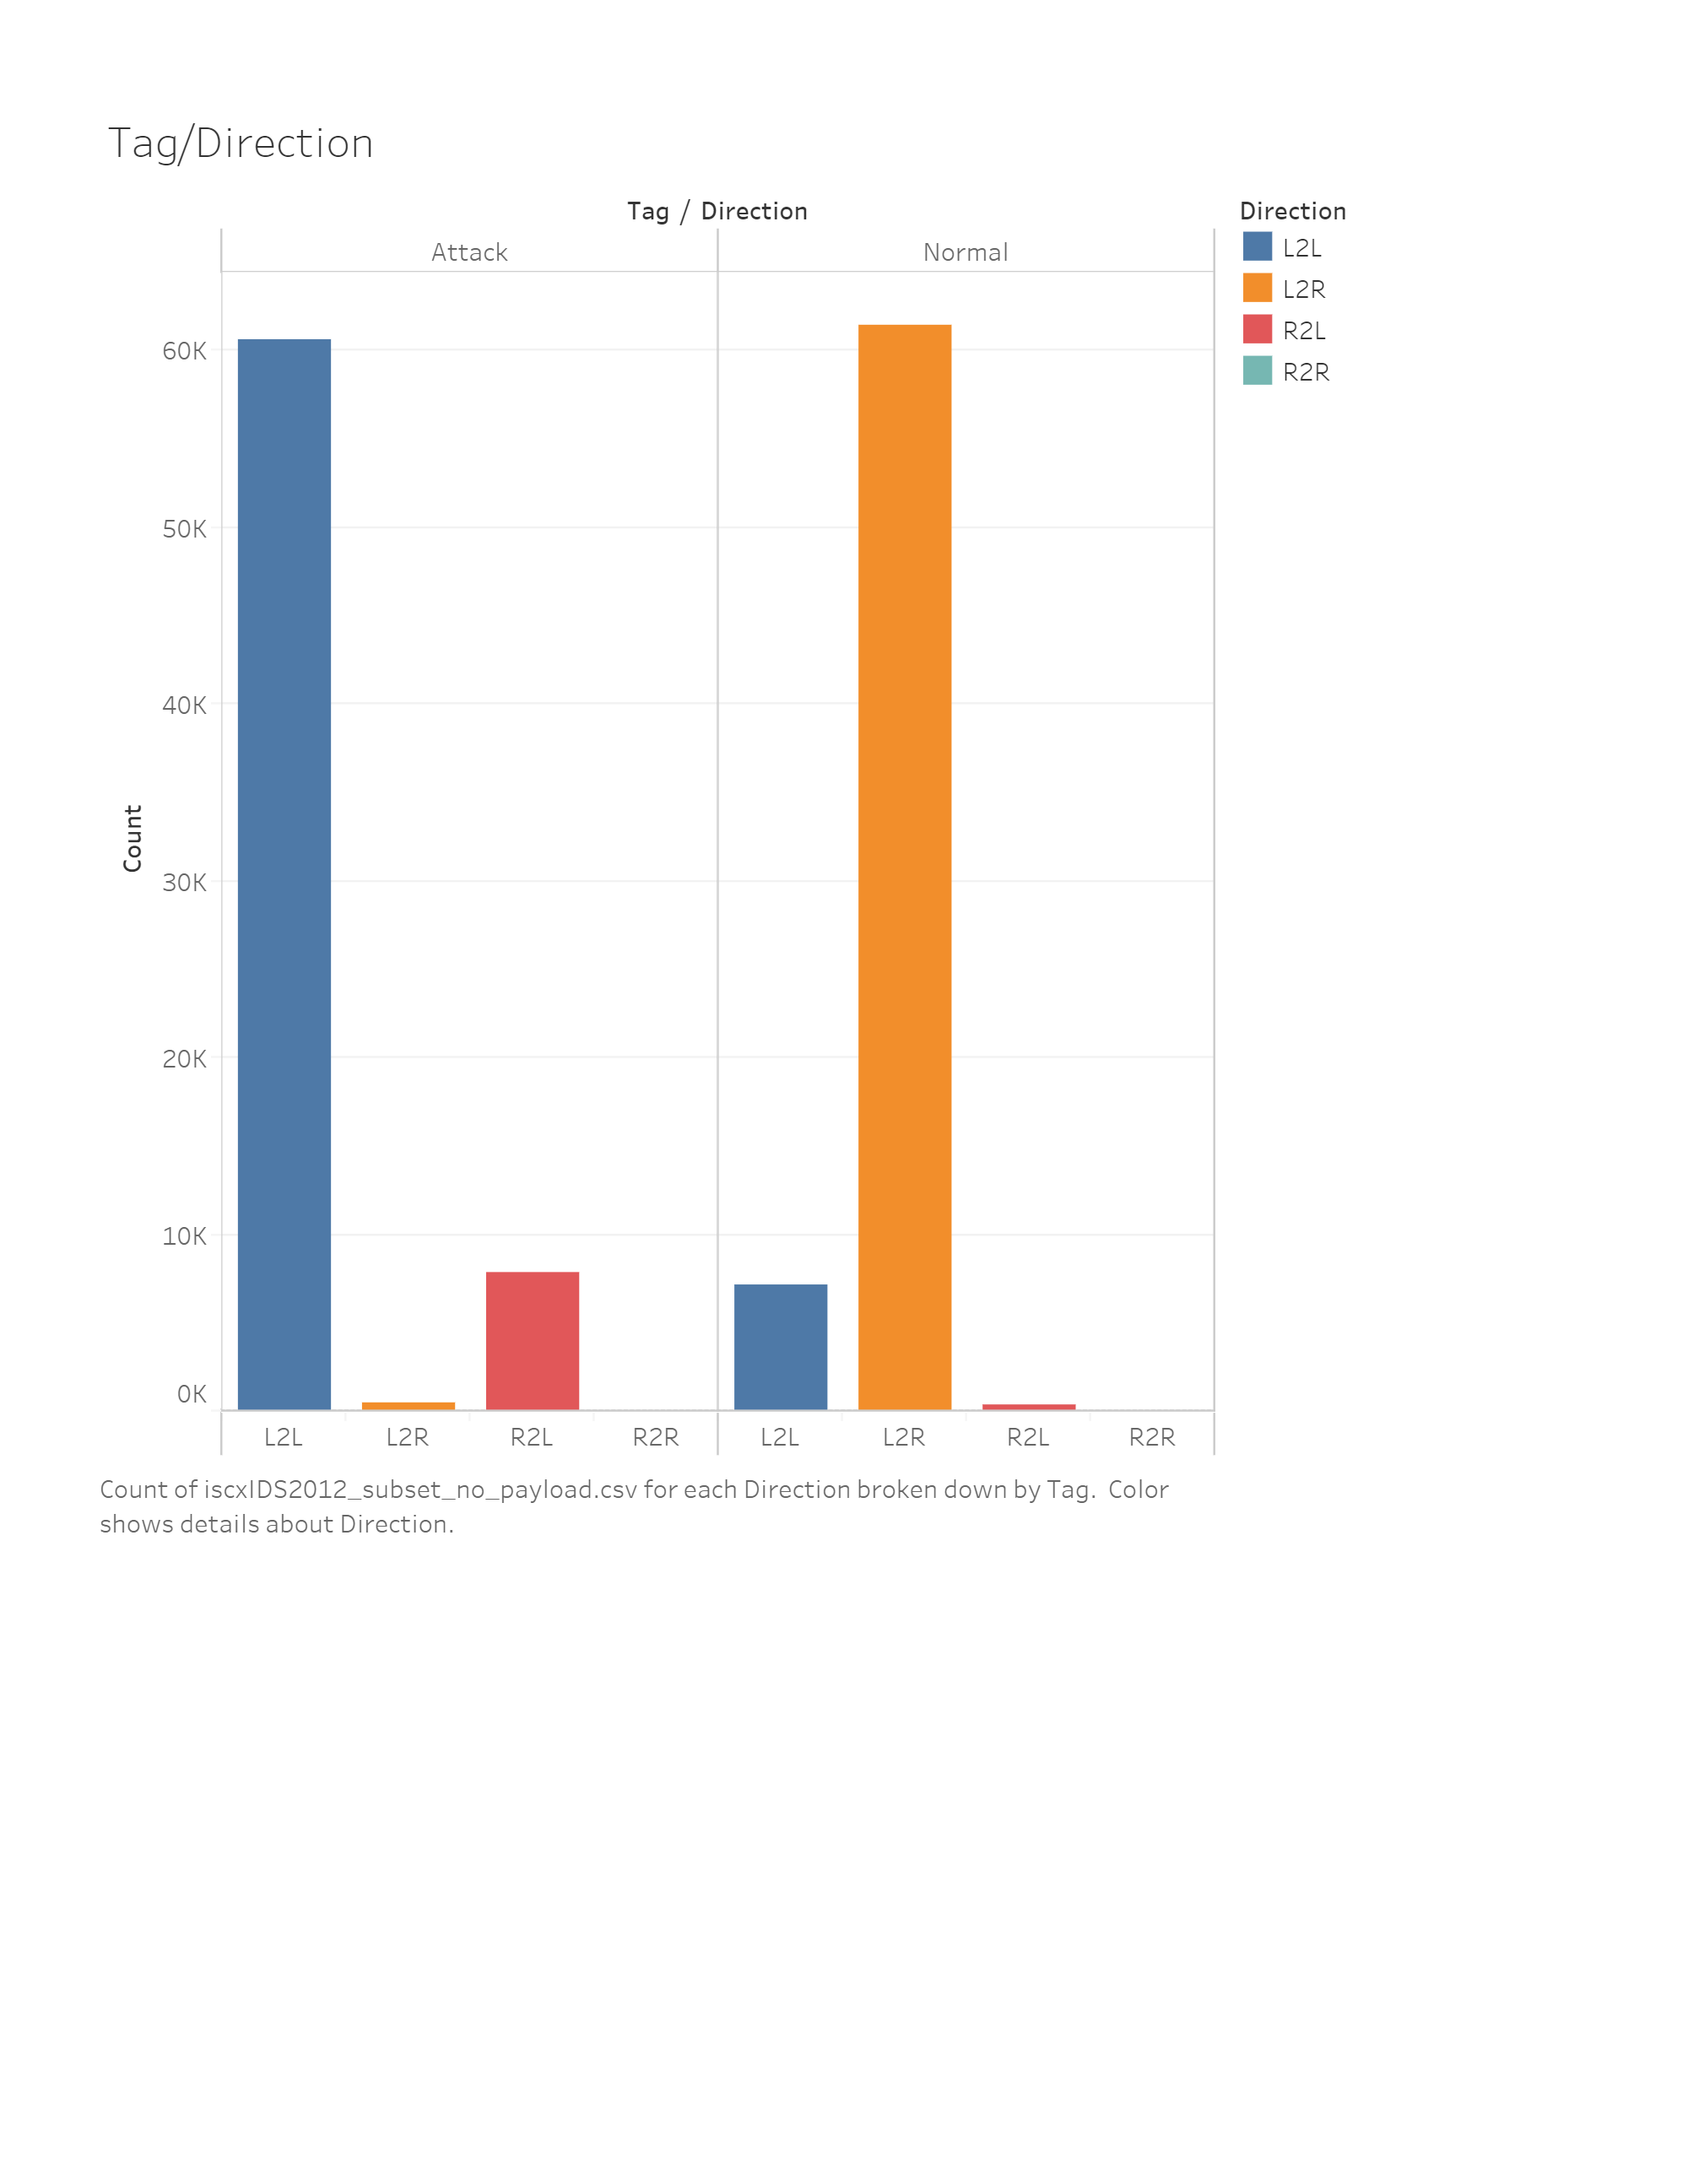

# Direction:
- L2L 
- L2R
- R2L
- R2R

In [50]:
print(x.shape)
print(y.shape)

(137820, 3)
(137820,)


In [51]:
y.value_counts()

0    68910
1    68910
Name: Tag, dtype: int64

In [52]:
x.head()

,appName,direction,protocolName
0,76,1,3
1,76,1,3
2,76,1,3
3,76,1,3
4,66,2,3


In [53]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20,  random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(110256, 3)
(110256,)
(27564, 3)
(27564,)


# Decision Tree Classification

In [54]:
clf = DecisionTreeClassifier(random_state=0)
score = cross_val_score(clf, X_train, y_train, cv=10)
print(score)
score.mean()

[0.98358426 0.98367495 0.9845819  0.98376564 0.98494468 0.98294939
 0.98312925 0.9815873  0.9847619  0.98258503]


0.9835564308315986

In [56]:
clf = clf.fit(X_train, y_train)
clf_pred = clf.predict(X_test)

In [59]:
# TP  FP
# FN  TN
confusion_matrix(y_test, clf_pred)

array([[13607,   227],
       [  249, 13481]], dtype=int64)

In [70]:
print(classification_report(y_test, clf_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     13834
           1       0.98      0.98      0.98     13730

    accuracy                           0.98     27564
   macro avg       0.98      0.98      0.98     27564
weighted avg       0.98      0.98      0.98     27564



In [61]:
print(accuracy_score(clf_pred, y_test))

0.9827310985343202


# Random Forest Classifier 

In [71]:
rf = RandomForestClassifier(random_state=0)
score = cross_val_score(rf, X_train, y_train, cv=10)
print(score)
score.mean()

[0.98358426 0.98367495 0.9845819  0.98376564 0.98494468 0.98304009
 0.98312925 0.9815873  0.9847619  0.98258503]


0.9835655003037553

In [72]:
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

In [68]:
# TP  FP
# FN  TN
confusion_matrix(y_test, rf_pred)

array([[13607,   227],
       [  250, 13480]], dtype=int64)

In [69]:
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     13834
           1       0.98      0.98      0.98     13730

    accuracy                           0.98     27564
   macro avg       0.98      0.98      0.98     27564
weighted avg       0.98      0.98      0.98     27564



In [40]:
accuracy_score(y_test, y_pred)

0.9817152808010449

# Challenge 2

In [76]:
x2 = transformed_data.drop(['appName'], axis=1).copy()
y2 = transformed_data['appName']

In [78]:
X2_train, X2_test, y2_train, y2_test = train_test_split(x2, y2, test_size =0.20, random_state=42)

# Decision Tree Classifier

In [79]:
clf2 = DecisionTreeClassifier() 
clf2.fit(X2_train, y2_train)

DecisionTreeClassifier()

In [80]:
pred_clf2 = clf2.predict(X2_test)

In [87]:
print(accuracy_score(y2_test, pred_clf2))

0.9074154694529096


# Random Forest Classifier

In [88]:
rf2 = RandomForestClassifier()
rf2.fit(X2_train, y2_train)

RandomForestClassifier()

In [89]:
pred_rf2 = rf2.predict(X2_test)

In [90]:
print(accuracy_score(y2_test, pred_rf2))

0.9210927296473661
